In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
DATA = "customer_segmentation_data" # Update this with your actual data folder path
file_path = os.path.join(DATA, "df_test_normalised.csv")
df = pd.read_csv("customer_segmentation_data/df_test_normalised.csv")

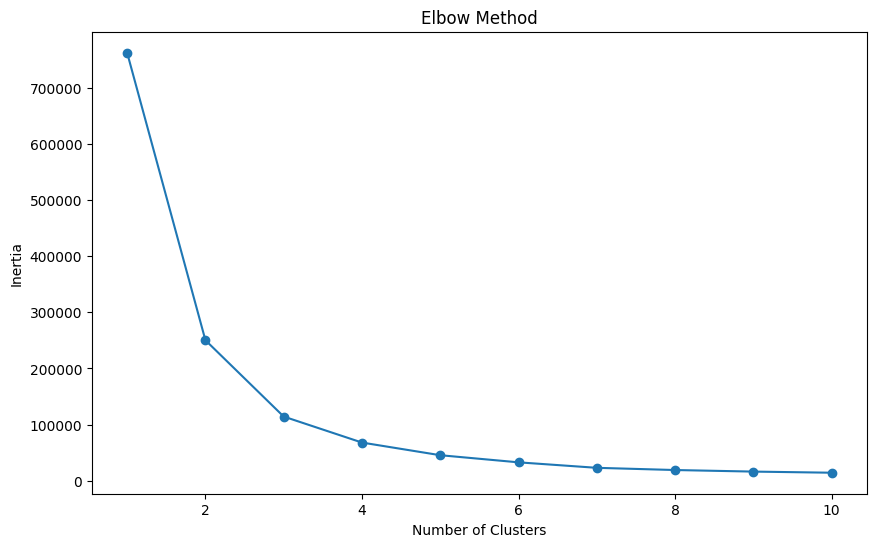

In [3]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df[['Age', 'Family_Size']])
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

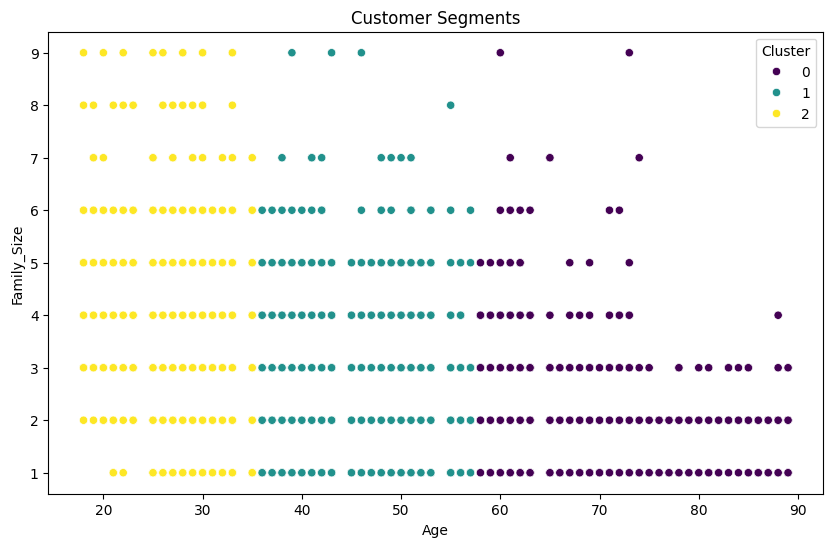

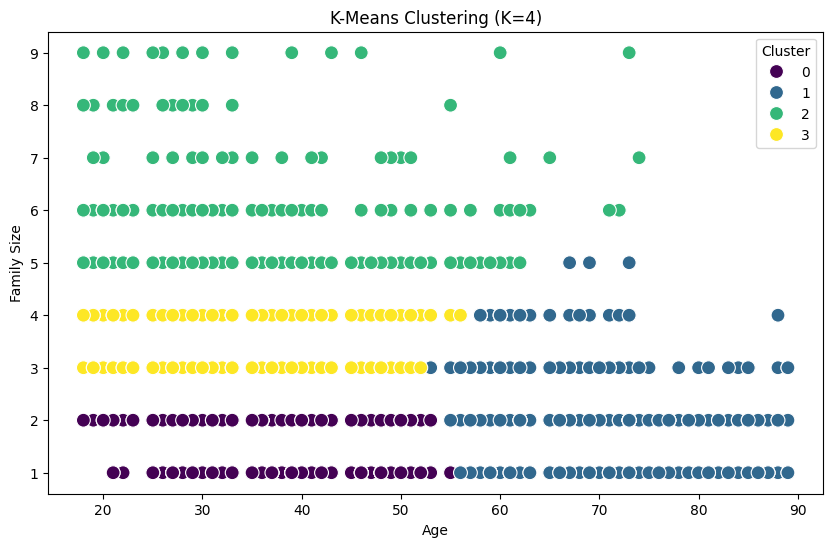

In [4]:
#This is segment by clarifying 3 clusters by age and family size.
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df[['Age', 'Family_Size']])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Family_Size',
hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.show()

features = ['Age', 'Family_Size']  # Adjust based on your dataset
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# based on elbow method
optimal_k = 4  # Change this based on the Elbow Method graph

# 6. Applying K-Means with chosen K
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df['Family_Size'], hue=df['Cluster'], palette='viridis', s=100)
plt.title(f'K-Means Clustering (K={optimal_k})')
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.legend(title='Cluster')
plt.show()

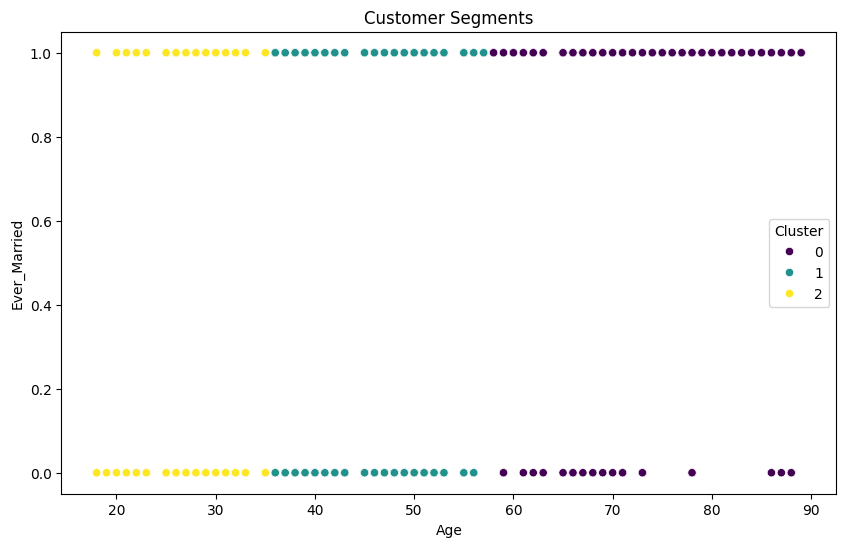

Biggest cluster is cluster 0


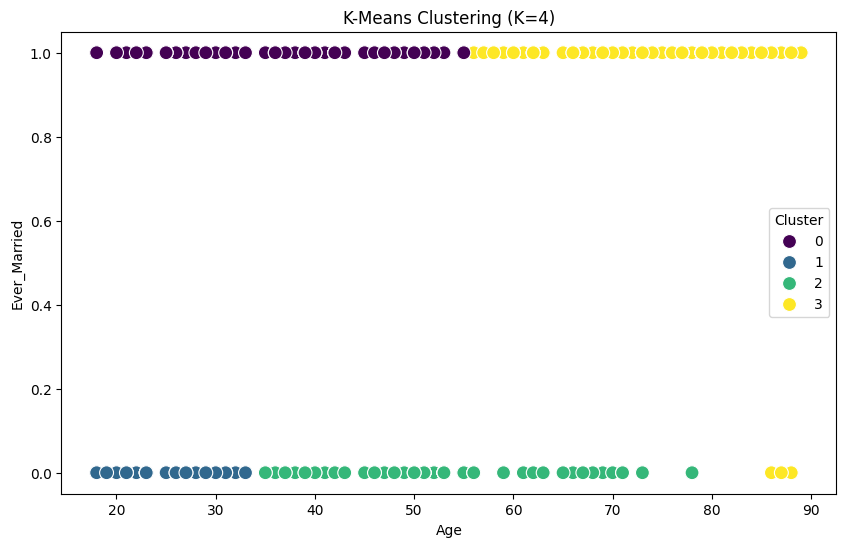

In [5]:
# This is segment by clarifying 3 clusters by age and ever married.
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df[['Age', 'Ever_Married']])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Ever_Married',
                hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.show()

features = ['Age', 'Ever_Married']  # Adjust based on your dataset
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# based on elbow method
optimal_k = 4  # Change this based on the Elbow Method graph

# 6. Applying K-Means with chosen K
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

biggest_cluster = df['Cluster'].mode()[0]
print(f"Biggest cluster is cluster {biggest_cluster}")

# Visualizing clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df['Ever_Married'], hue=df['Cluster'], palette='viridis', s=100)
plt.title(f'K-Means Clustering (K={optimal_k})')
plt.xlabel('Age')
plt.ylabel('Ever_Married')
plt.legend(title='Cluster')
plt.show()